In [ ]:
# Necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Reddit sentiment analysis dataset
url = 'https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv'
data = pd.read_csv(url)
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
# Shape of the dataset (how many rows and columns you have)
data.shape

(37249, 2)

In [4]:
# Display any kinds of comments
data.sample()['clean_comment'].values

array([' have lost lot internet freedom and looks like will lose more bjp will take india back the 19th century '],
      dtype=object)

In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
# Check for missing values
data.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [ ]:
# Display the missing rows
data[data['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [8]:
# Display all the categries of the missing values
data[data['clean_comment'].isnull()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [9]:
# Drop the missing values
data.dropna(inplace=True)

In [10]:
# Check for duplicates
data.duplicated().sum()

np.int64(350)

In [11]:
# Display the duplicates
data[data.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [12]:
# Drop the duplicates
data.drop_duplicates(inplace=True)

In [13]:
# Check if duplicates are removed
data.duplicated().sum()

np.int64(0)

In [14]:
# Check whether there are new lines in the comments
data[(data['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [15]:
# Removing the new lines
data = data[~(data['clean_comment'].str.strip() == '')]

In [16]:
# Convert the clean_comments (all the characters) to lowercase
data['clean_comment'] = data['clean_comment'].str.lower()

# Display the transformation result
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [17]:
# Check for rows which are starting with empty spaces and those that are ending with empty spaces
data[data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

# Verify if there are any leading or trailing spaces

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [18]:
# Remove the trailing and leading spaces from the 'clean_comment' column
data['clean_comment'] = data['clean_comment'].str.strip()

# Verify if the leading and trailing spaces are removed
data[data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [19]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = data[data['clean_comment'].str.contains(url_pattern, regex=True)]

# Display comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [20]:
# Identify comments containing new line characters
comments_with_newlines = data[data['clean_comment'].str.contains(r'\n')]

# Display comments containing new line characters
comments_with_newlines.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
# Remove the new lines characters from the 'clean_comment' column
data['clean_comment'] = data['clean_comment'].str.replace(r'\n', ' ', regex=True)

# Verify if the new line characters are removed
data[data['clean_comment'].str.contains(r'\n')].head()

,clean_comment,category


## EDA - Exploratory Data Analysis

In [22]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category', ylabel='count'>

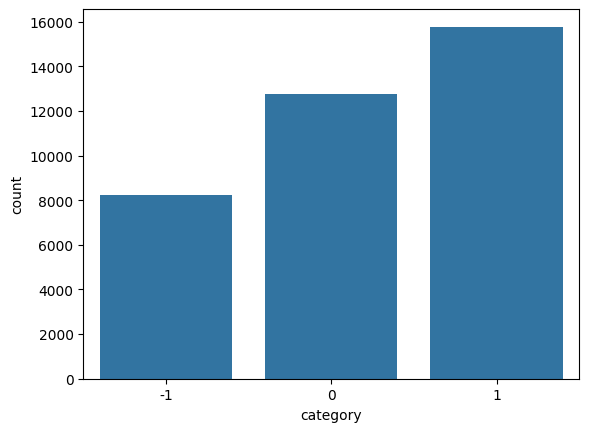

In [23]:
# Display the distribution of sentiment labels
sns.countplot(x='category', data=data)

In [24]:
# Display frequency distribution of sentiment labels
data['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [25]:
# Create a new column for word count
data['word_count'] = data['clean_comment'].apply(lambda x: len(x.split()))

In [26]:
# Display a few data samples
data.sample(5)

,clean_comment,category,word_count
34300,insulting smriti irani you have insulted all i...,-1,12
5429,qualcuno sta giocando the phantom pain questo ...,0,10
27089,have not had time today read through every sin...,-1,38
21646,ask himmwhere was when the prime minister was ...,1,25
15979,are going completely forget the anti sikh revo...,1,16


In [27]:
# Summary statistics for the word count
data['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

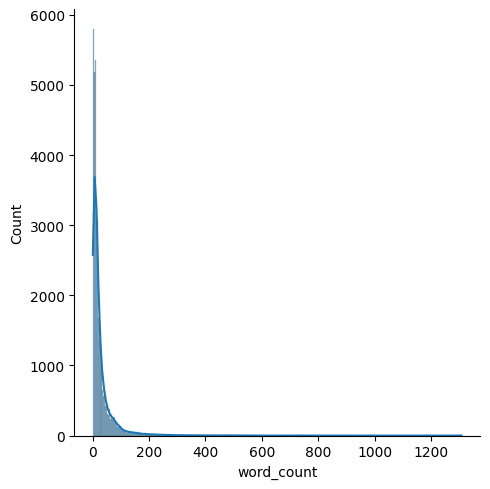

In [28]:
# Visualize the word count distribution
sns.displot(data['word_count'], kde=True)

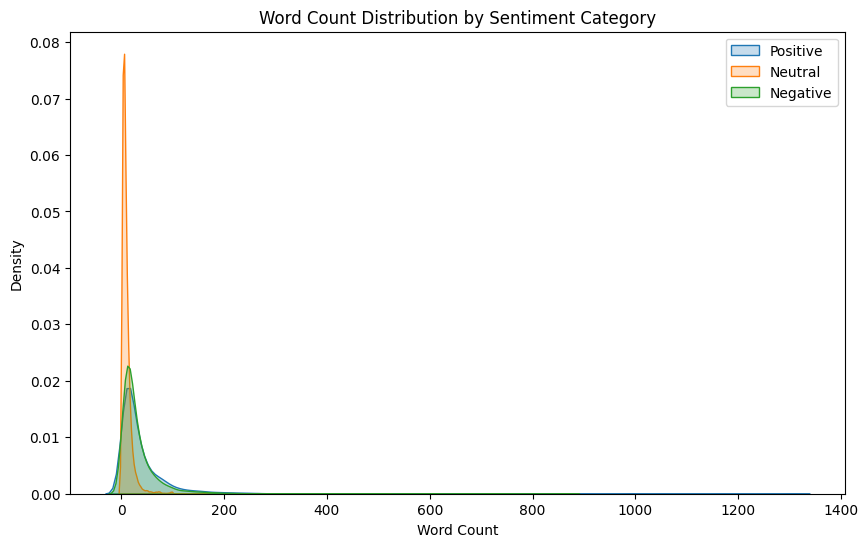

In [29]:
# More advanced plot to visualize word count distribution by category
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(data[data['category'] == 1]['word_count'], fill=True, label='Positive')

# Plot KDE for category 0
sns.kdeplot(data[data['category'] == 0]['word_count'], fill=True, label='Neutral')

# Plot KDE for category -1
sns.kdeplot(data[data['category'] == -1]['word_count'], fill=True, label='Negative')

# Add titles and labels
plt.title('Word Count Distribution by Sentiment Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1):** These comments tend to have a wider spread in word count indicating the longer comments are more common in positive sentiments.

**Neutral comments (category 0):** The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.

**Negative comments (category -1):** These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

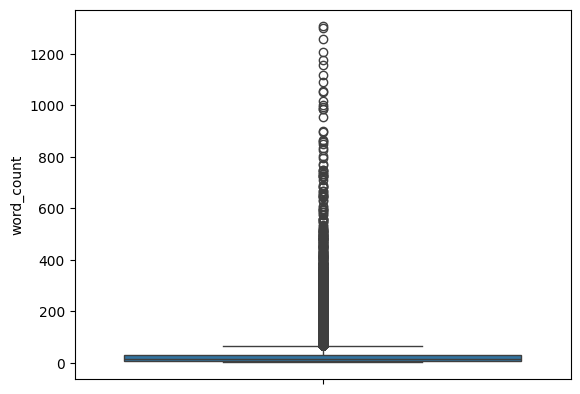

In [30]:
# Visualize the box plot for word count
sns.boxplot(data['word_count'])


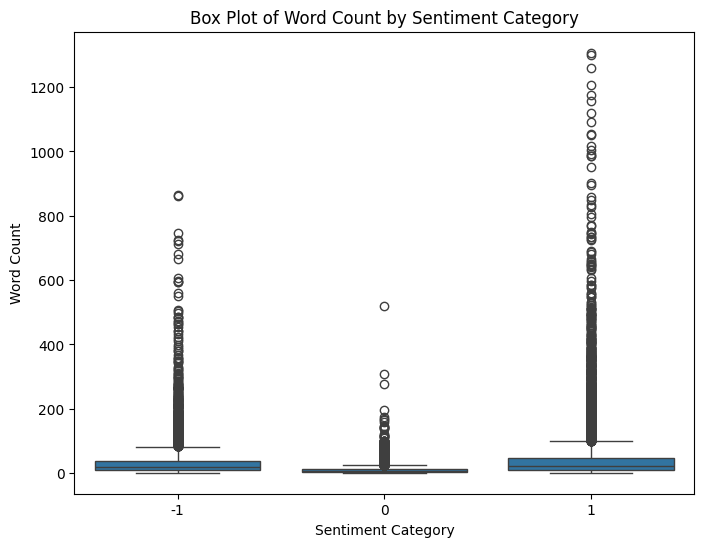

In [31]:
# Create a box plot for the 'word_count' column grouped by 'category'
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='word_count', data=data)
plt.title('Box Plot of Word Count by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1):** The median word count is relatively high, and there are several outliers with longer comments, indicating that the positive comments tend to be more verbose.

**Neutral comments (category 0):** The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.

**Negative comments (category -1):** The word count distribution is similar to that of positive comments, but with a slightly loer median and fewer extreme outliers.

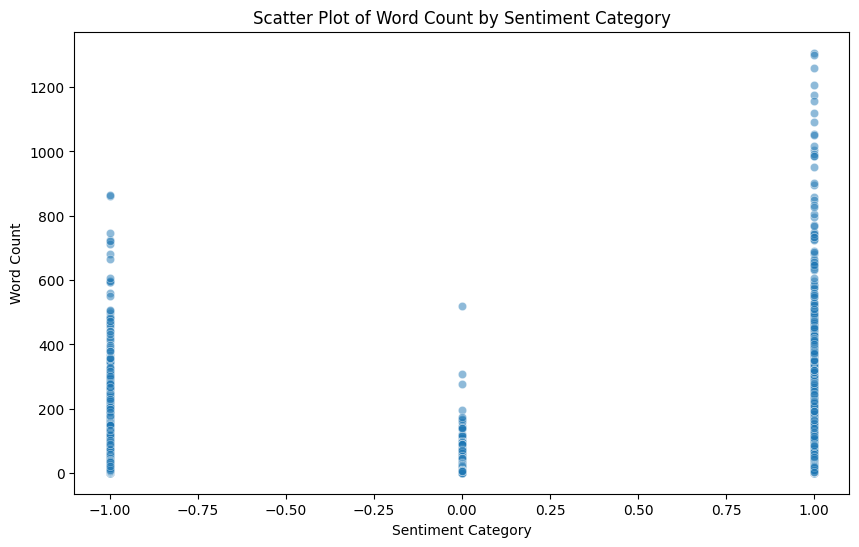

In [32]:
# Visualize the scatterplot between word count and category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='category', y='word_count', data=data, alpha=0.5)
plt.title('Scatter Plot of Word Count by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

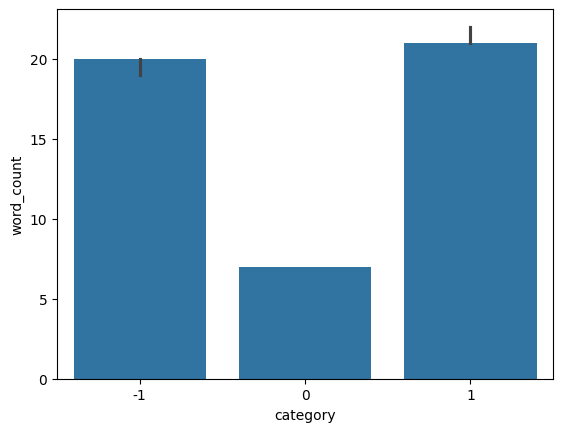

In [33]:
# Median word counts among sentiments
sns.barplot(x='category', y='word_count', data=data, estimator='median')

In [35]:
# Identify stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Define the list of English stop words
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stopwords' to count the number of stop words in each comment
data['num_stopwords'] = data['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SirIsaac\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
# Display a few data samples
data.sample(5)

,clean_comment,category,word_count,num_stopwords
27715,step move another country step criticize all w...,-1,36,5
5436,molto casual che non voglia cercare ios9 bene ...,-1,32,0
28185,’ really curious how these sound compared hd60...,1,23,7
35232,soon get into congress and will try become ano...,0,10,3
29877,and this making rounds whatsapp where people a...,1,38,12


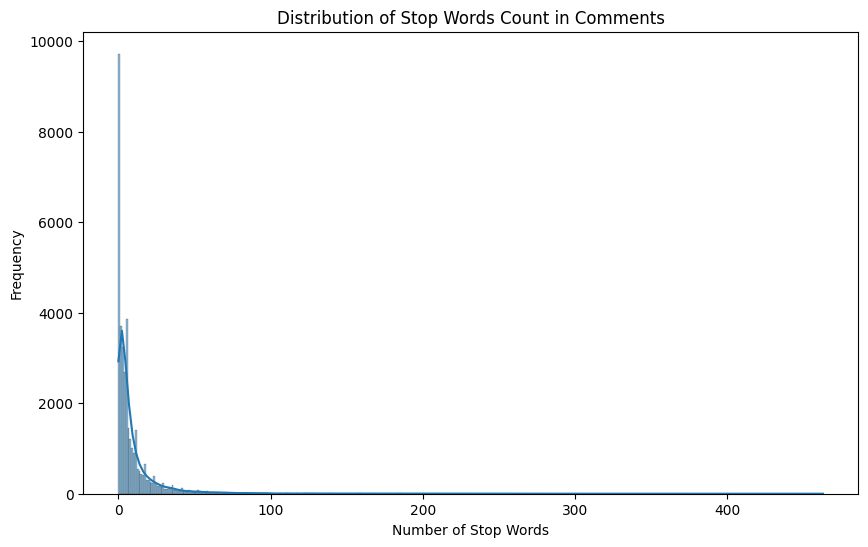

In [37]:
# Create a distribution plot for the number of stop words
plt.figure(figsize=(10, 6))
sns.histplot(data['num_stopwords'], kde=True)
plt.title('Distribution of Stop Words Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

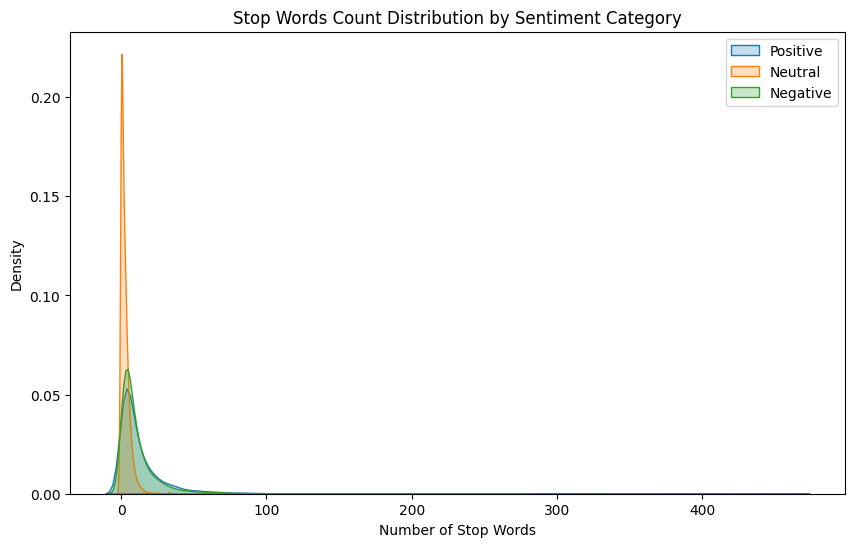

In [38]:
# More advanced plot to visualize stop words distribution by category
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(data[data['category'] == 1]['num_stopwords'], fill=True, label='Positive')

# Plot KDE for category 0
sns.kdeplot(data[data['category'] == 0]['num_stopwords'], fill=True, label='Neutral')

# Plot KDE for category -1
sns.kdeplot(data[data['category'] == -1]['num_stopwords'], fill=True, label='Negative')

# Add titles and labels
plt.title('Stop Words Count Distribution by Sentiment Category')
plt.xlabel('Number of Stop Words')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stopwords'>

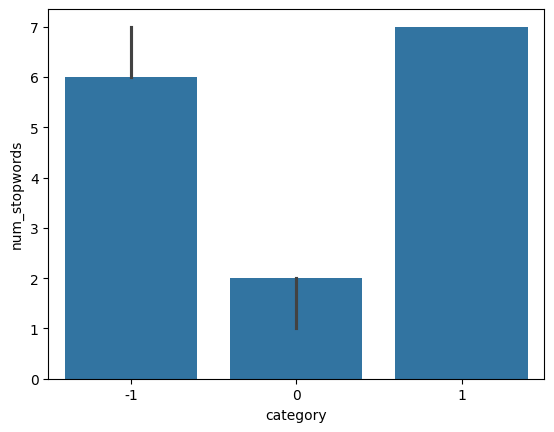

In [39]:
# Median stop words counts among sentiments
sns.barplot(x='category', y='num_stopwords', data=data, estimator='median')

C:\Users\SirIsaac\AppData\Local\Temp\ipykernel_12984\3962437169.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Stop Word', data=top_25_df, palette='viridis')


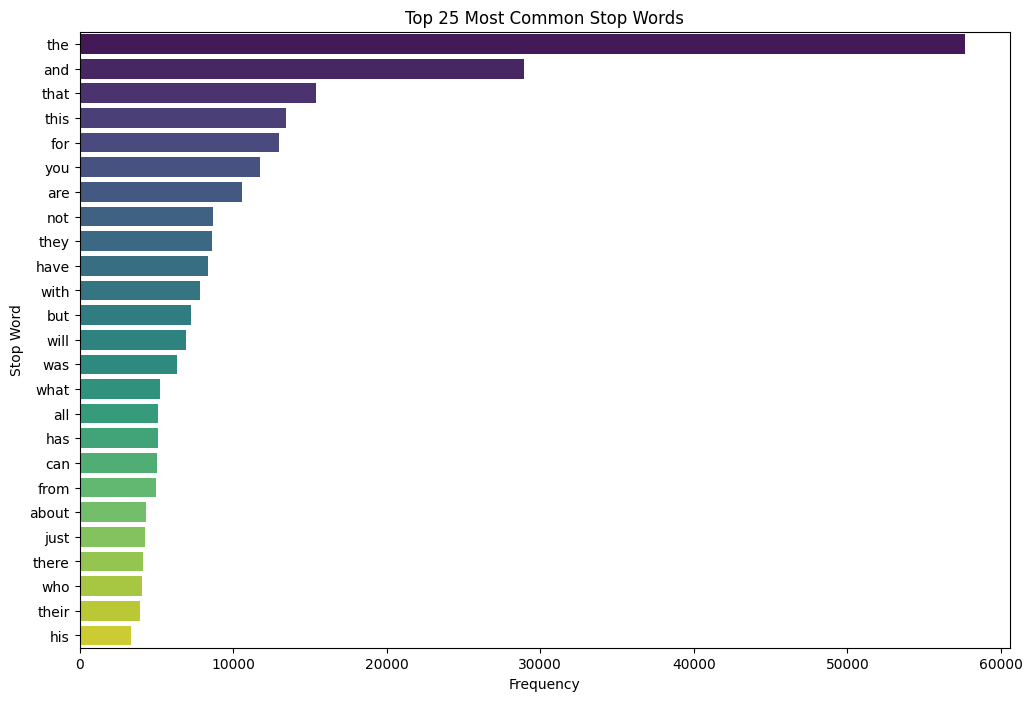

In [40]:
# Most used stop words
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in data['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert to DataFrame for better visualization
top_25_df = pd.DataFrame(most_common_stop_words, columns=['Stop Word', 'Frequency'])

# Plot the most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Stop Word', data=top_25_df, palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Frequency')
plt.ylabel('Stop Word')
plt.show()

In [41]:
# Number of characters in each comment
data['num_characters'] = data['clean_comment'].apply(len)

In [42]:
data.head()

,clean_comment,category,word_count,num_stopwords,num_characters
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [43]:
# Summary statistics for the number of characters
data['num_characters'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_characters, dtype: float64

In [44]:
# Identify special characters present in the comments
# Combine all comments into a single large string
all_comments = ' '.join(data['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_comments)

# Convert the character frequency to a DataFrame for better visualization
char_freq_df = pd.DataFrame(char_frequency.items(), columns=['Character', 'Frequency']).sort_values(by='Frequency', ascending=False)

char_freq_df['Character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], shape=(1378,), dtype=object)

In [45]:
char_freq_df.tail(50)

,Character,Frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [46]:
# Create a column of 'num_punctuation_chars' to count the number of punctuation characters in each comment
data['num_punctuation_chars'] = data['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?:;\'"()[]{}-']))
data.sample(5)

,clean_comment,category,word_count,num_stopwords,num_characters,num_punctuation_chars
432,whats that big fish thing naga whale,0,7,1,36,0
2490,that pretty cool sure was intentional,1,6,2,37,0
7195,not touch food with your left hand left handed,0,9,3,46,0
28341,every individual different but when lot ppl be...,1,85,27,517,0
23113,somehow the headline and the thumbnail complem...,-1,9,5,60,0


In [47]:
# Summary statistics for the number of punctuation characters
data['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

C:\Users\SirIsaac\AppData\Local\Temp\ipykernel_12984\3723349989.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='magma')


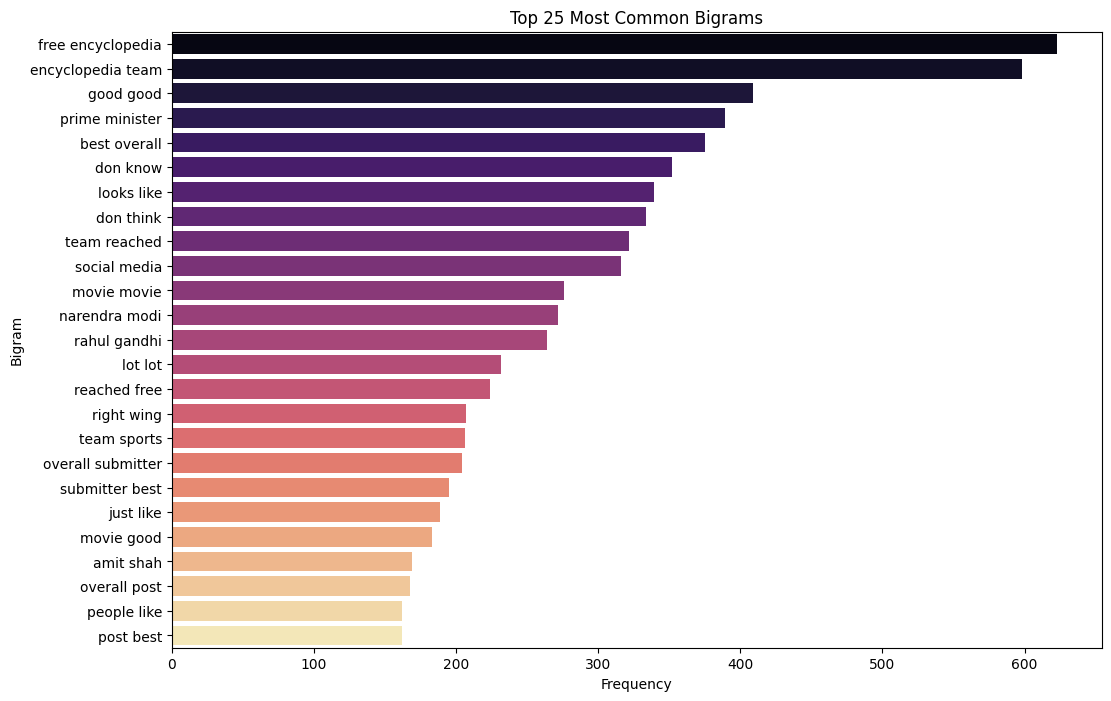

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Ctreate a function to extract the top 25 bigrams
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_n_bigrams(data['clean_comment'], n=25)

# Convert to DataFrame for better visualization
bigram_df = pd.DataFrame(top_25_bigrams, columns=['Bigram', 'Frequency'])

# Plot the most common bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

C:\Users\SirIsaac\AppData\Local\Temp\ipykernel_12984\1651962637.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='coolwarm')


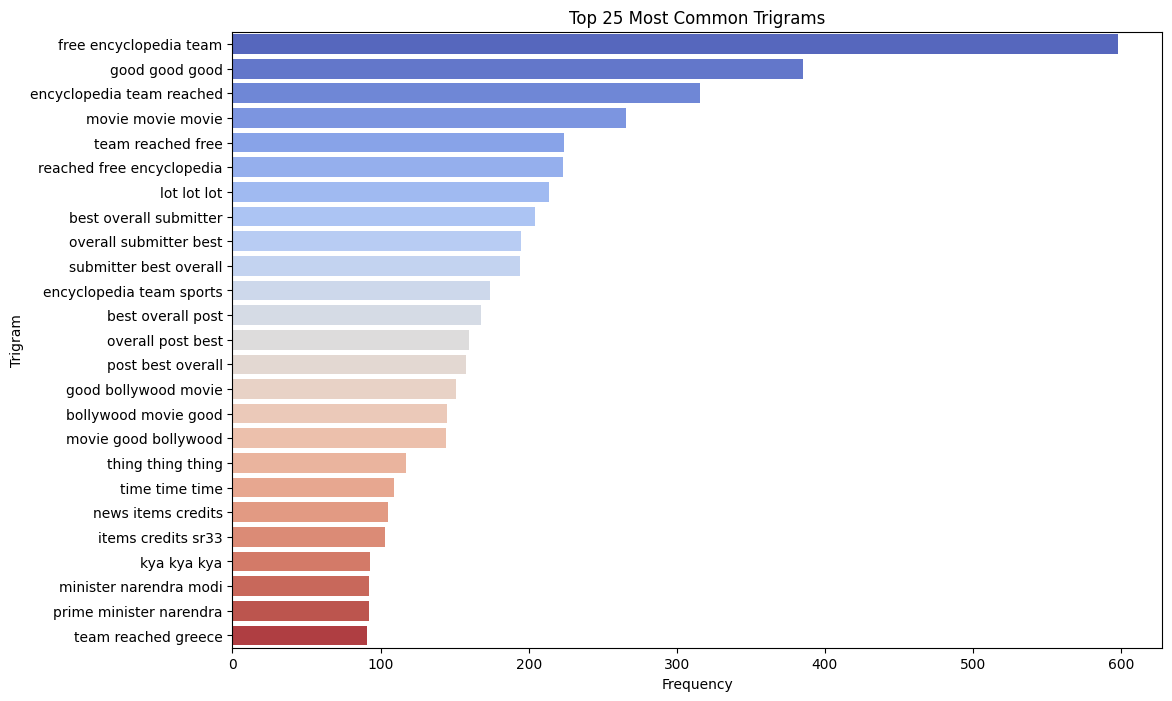

In [49]:
# Create a function to extract the top 25 trigrams
def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_n_trigrams(data['clean_comment'], n=25)

# Convert to DataFrame for better visualization
trigram_df = pd.DataFrame(top_25_trigrams, columns=['Trigram', 'Frequency'])

# Plot the most common trigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Trigram', data=trigram_df, palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [50]:
# Remove all non-English special characters from the 'clean_comment' column
# Keep only standard English letters, digits, and common punctuation
import re

data['clean_comment'] = data['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s.,!?]', '', str(x)))

In [51]:
all_comments = ' '.join(data['clean_comment'])

# Count the frequency of each character again after cleaning
char_frequency = Counter(all_comments)

# Convert the character frequency to a DataFrame for better visualization
char_freq_df = pd.DataFrame(char_frequency.items(), columns=['Character', 'Frequency']).sort_values(by='Frequency', ascending=False)

char_freq_df.head(20)

,Character,Frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [52]:
data.head()

,clean_comment,category,word_count,num_stopwords,num_characters,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [53]:
# Defining sto words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'no', 'but', 'however', 'yet'}

# Remove stop words from the 'clean_comment' column, retaining essential ones
data['clean_comment'] = data['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

data.head()

,clean_comment,category,word_count,num_stopwords,num_characters,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [54]:
# Add Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
data['clean_comment'] = data['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SirIsaac\AppData\Roaming\nltk_data...


,clean_comment,category,word_count,num_stopwords,num_characters,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


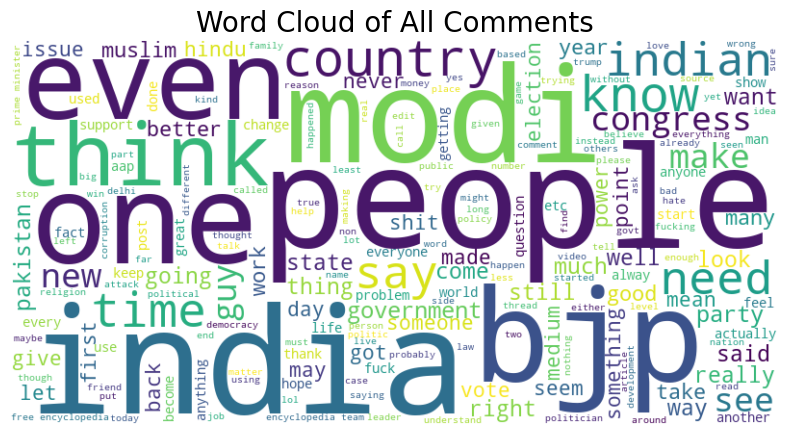

In [56]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

plot_wordcloud(data['clean_comment'], 'Word Cloud of All Comments')

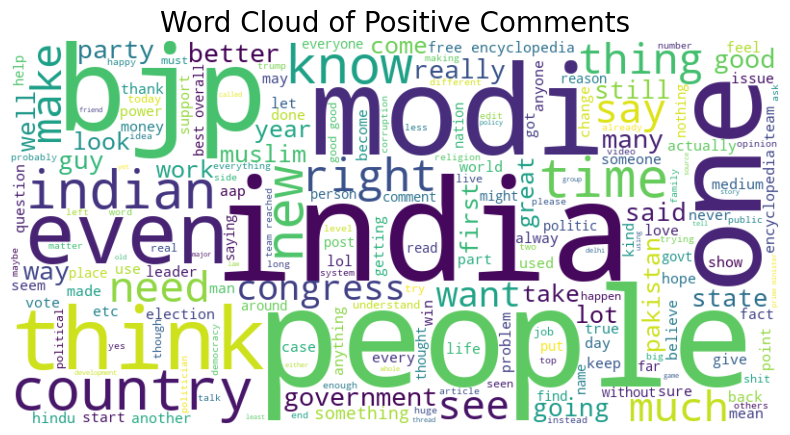

In [57]:
# Word cloud for positive comments
plot_wordcloud(data[data['category'] == 1]['clean_comment'], 'Word Cloud of Positive Comments')

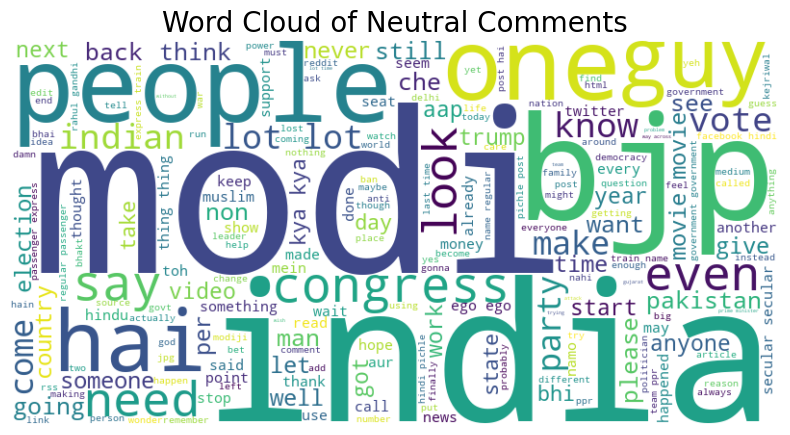

In [58]:
# Word cloud for neutral comments
plot_wordcloud(data[data['category'] == 0]['clean_comment'], 'Word Cloud of Neutral Comments')

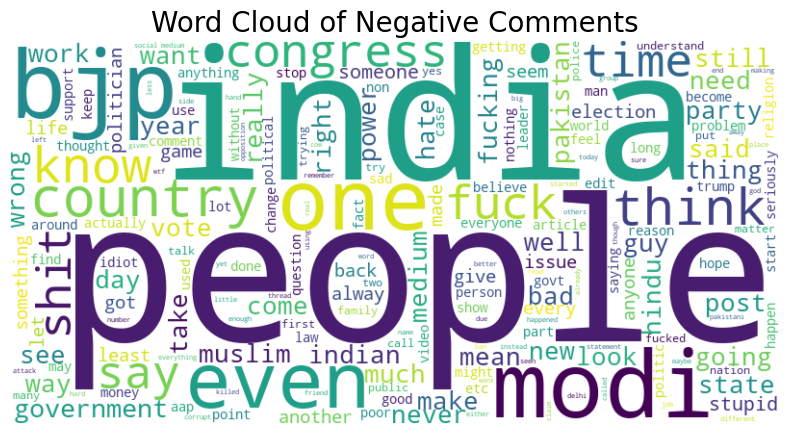

In [59]:
# Word cloud for negative comments
plot_wordcloud(data[data['category'] == -1]['clean_comment'], 'Word Cloud of Negative Comments')

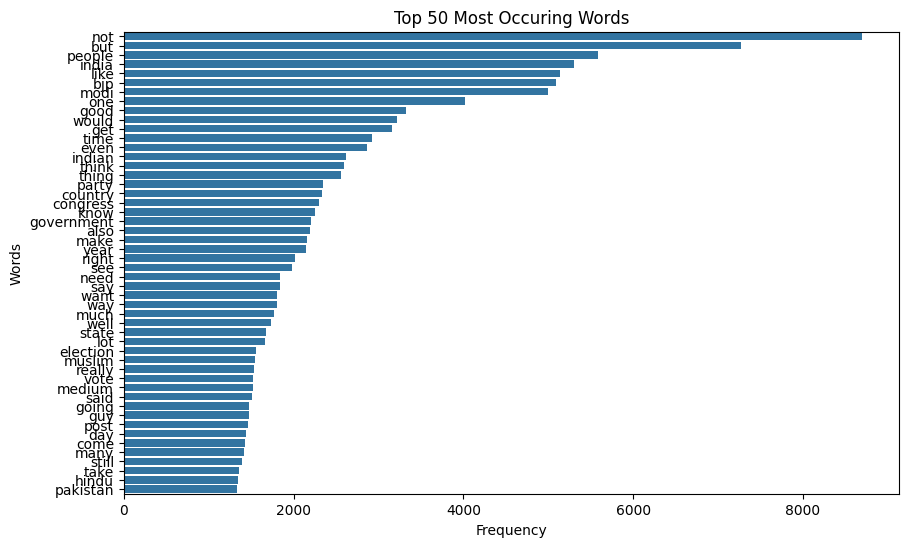

In [ ]:
# Most occuring words
def get_top_n_words(corpus, n=20):
    """Plot the top N most occuring words in the corpus"""
    # Flatten all words in the content clumn
    words = ' '.join(data['clean_comment']).split()
    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their frequencies for plotting
    words, frequencies = zip(*most_common_words)

    # Plot the top N most common words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequencies), y=list(words))
    plt.title(f'Top {n} Most Occuring Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
get_top_n_words(data, n=50)

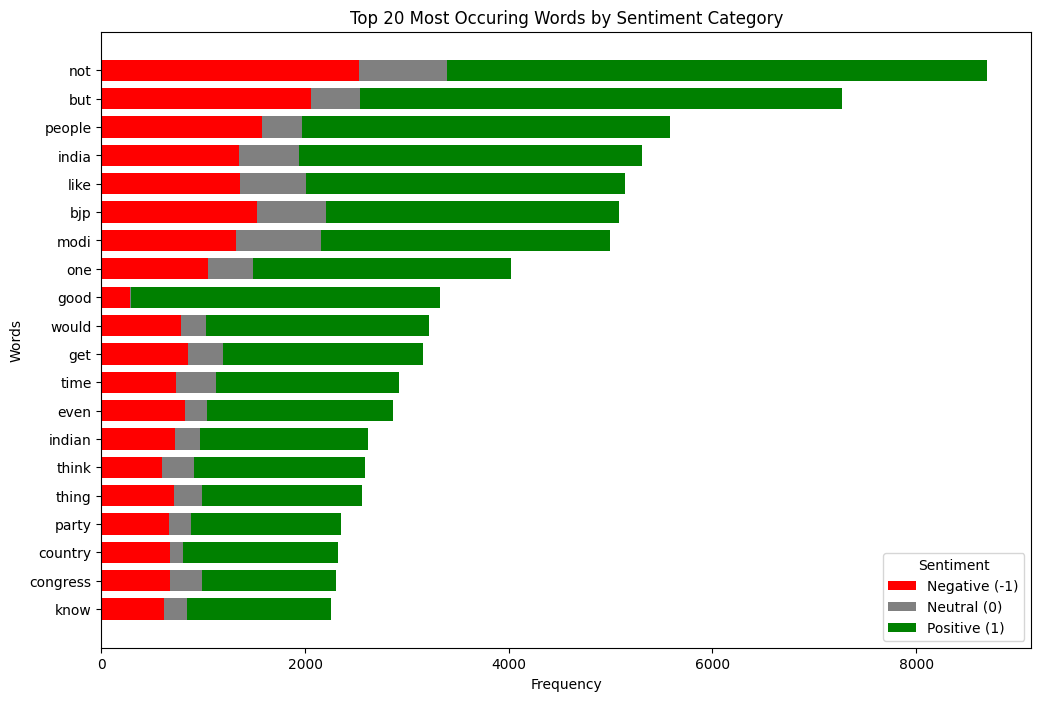

In [62]:
def plot_top_n_words_by_category(data, n=20, start=0):
    """Plot the top N most occuring words in the dataset with stacked hue based on sentiment category"""
    # Flatten all words in the content column and their occurences by category
    word_category_counts = {}

    for idx, row in data.iterrows():
        words = row['clean_comment'].split()
        category = row['category'] # Assuming 'category' is the sentiment label
        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1: 0, 0: 0, 1: 0} # Initialize counts for each category
            # Increment the count for the respective category
            word_category_counts[word][category] += 1
    # Gt total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most common words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start + start:n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Create bars for each category
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i, j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Occuring Words by Sentiment Category')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
    plt.show()

# Example usage
plot_top_n_words_by_category(data, n=20)